# 시그모이드 함수 그리기

시그모이드 함수를 1 / (1 + e^(wx+b))로 규정  

## 일반적인 시그모이드 함수

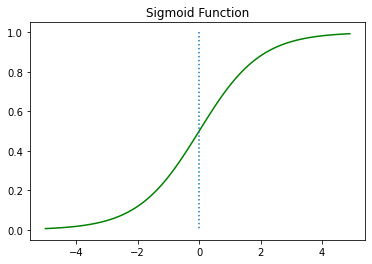

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

w는 1, b는 0일때의 시그모이드(우리가 알고 있는 시그모이드 함수)

## w의 값을 변화시켰을 때의 시그모이드 함수

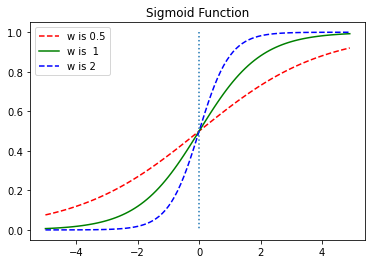

In [2]:
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--', label = 'w is 0.5') # w의 값이 0.5일때
plt.plot(x, y2, 'g',label = 'w is  1') # w의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--', label = 'w is 2') # w의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.legend()
plt.title('Sigmoid Function')
plt.show()

w의 값에 따라 그래프의 경사도가 변함. 선형회귀에서는 w는 그래프의 기울기를 의미했지만 로지스틱회귀에서의 w는 그래프의 경사도를 의미합니다. w가 커지면 경사도가 올라가고 w가 작아지면 경사도가 낮아지는 것을 확인할 수 있습니다.

## b의 값을 변화시켰을 때의 시그모이드 함수

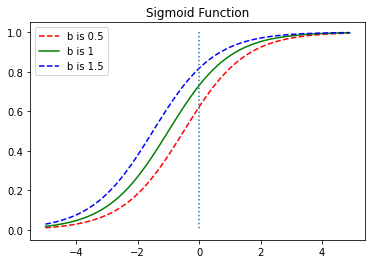

In [3]:
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--', label = 'b is 0.5') # x + 0.5
plt.plot(x, y2, 'g', label = 'b is 1') # x + 1
plt.plot(x, y3, 'b', linestyle='--', label = 'b is 1.5') # x + 1.5
plt.legend()
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

b에 따라서 그래프가 이동. 시그모이드함수의 출력값이 0.5 이상이면 1, 이하이면 0으로 분류

# 로지스틱 회귀 모델 구현

## 기본 세팅

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 위스콘신 유방암 데이터 불러오기
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

## 로지스틱 회귀를 이용해 학습 및 예측을 수행

In [6]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)

## 평가 지표를 사용해 모델 성능 측정

** 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성 **

In [7]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score, roc_curve 

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test , pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 스코어: {3:.4f}, roc_auc: {4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    
get_clf_eval(y_test, lr_preds)

오차 행렬
[[ 60   3]
 [  1 107]]
정확도: 0.9766, 정밀도: 0.9727, 재현율: 0.9907, F1 스코어: 0.9817, roc_auc: 0.9716


## 임계값에 따라 달라지는 평가 지표 확인

** predict_proba( ) 메소드 확인 **

In [8]:
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , lr_preds.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (171, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.99864569 0.00135431]
 [0.03842822 0.96157178]
 [0.00130563 0.99869437]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.99864569 0.00135431 0.        ]
 [0.03842822 0.96157178 1.        ]
 [0.00130563 0.99869437 1.        ]]


** Binarizer 활용 **

In [9]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [10]:
# 임계 값에 따라 데이터를 이진화합니다 (특성 값을 0 또는 1로 설정).
# 임계 값보다 큰 값은 1에 매핑되고 임계 값보다 작거나 같은 값은 0에 매핑됩니다. 
from sklearn.preprocessing import Binarizer

# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0, 0.4, 0.45, 0.50, 0.55, 0.60, 0.9, 1]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list 내의 값을 차례로 반복적으로 모델 평가 지표 출력.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)# 임계값 수정
        print('[[임곗값:',custom_threshold, ']]')
        get_clf_eval(y_test , custom_predict)
        print('')

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds)

[[임곗값: 0 ]]
오차 행렬
[[  0  63]
 [  0 108]]
정확도: 0.6316, 정밀도: 0.6316, 재현율: 1.0000, F1 스코어: 0.7742, roc_auc: 0.5000

[[임곗값: 0.4 ]]
오차 행렬
[[ 59   4]
 [  1 107]]
정확도: 0.9708, 정밀도: 0.9640, 재현율: 0.9907, F1 스코어: 0.9772, roc_auc: 0.9636

[[임곗값: 0.45 ]]
오차 행렬
[[ 59   4]
 [  1 107]]
정확도: 0.9708, 정밀도: 0.9640, 재현율: 0.9907, F1 스코어: 0.9772, roc_auc: 0.9636

[[임곗값: 0.5 ]]
오차 행렬
[[ 60   3]
 [  1 107]]
정확도: 0.9766, 정밀도: 0.9727, 재현율: 0.9907, F1 스코어: 0.9817, roc_auc: 0.9716

[[임곗값: 0.55 ]]
오차 행렬
[[ 61   2]
 [  5 103]]
정확도: 0.9591, 정밀도: 0.9810, 재현율: 0.9537, F1 스코어: 0.9671, roc_auc: 0.9610

[[임곗값: 0.6 ]]
오차 행렬
[[ 61   2]
 [  7 101]]
정확도: 0.9474, 정밀도: 0.9806, 재현율: 0.9352, F1 스코어: 0.9573, roc_auc: 0.9517

[[임곗값: 0.9 ]]
오차 행렬
[[62  1]
 [17 91]]
정확도: 0.8947, 정밀도: 0.9891, 재현율: 0.8426, F1 스코어: 0.9100, roc_auc: 0.9134

[[임곗값: 1 ]]
오차 행렬
[[ 63   0]
 [108   0]]
정확도: 0.3684, 정밀도: 0.0000, 재현율: 0.0000, F1 스코어: 0.0000, roc_auc: 0.5000



C:\Users\hyunj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


임계값이 0이 되면 재현율이 1이 된 것을 확인.

In [11]:
pred_proba

array([[9.98645694e-01, 1.35430649e-03],
       [3.84282175e-02, 9.61571783e-01],
       [1.30562858e-03, 9.98694371e-01],
       [1.03849030e-02, 9.89615097e-01],
       [2.45997949e-04, 9.99754002e-01],
       [5.90660606e-03, 9.94093394e-01],
       [1.53858124e-04, 9.99846142e-01],
       [1.66513655e-03, 9.98334863e-01],
       [8.61333455e-05, 9.99913867e-01],
       [2.37564216e-06, 9.99997624e-01],
       [2.14530404e-01, 7.85469596e-01],
       [7.58383388e-02, 9.24161661e-01],
       [1.57971029e-05, 9.99984203e-01],
       [4.78248412e-01, 5.21751588e-01],
       [4.37381550e-01, 5.62618450e-01],
       [9.95842423e-01, 4.15757735e-03],
       [6.20911666e-03, 9.93790883e-01],
       [9.99995710e-01, 4.28969606e-06],
       [9.99900609e-01, 9.93913010e-05],
       [9.99999997e-01, 3.12772905e-09],
       [9.98584477e-01, 1.41552273e-03],
       [9.79628053e-01, 2.03719470e-02],
       [1.98566406e-02, 9.80143359e-01],
       [1.26199951e-03, 9.98738000e-01],
       [9.990851

pred_proba는 0열이 0이 될 확률, 1열이 1이 될 확률입니다.

pred_proba[:,1].reshape(-1,1)는 1이 될 확률만 가지고와서 그거를 열이 하나인 넘파이로 만들어주는 것입니다.

In [12]:
pred_proba[:,1].reshape(-1,1)

array([[1.35430649e-03],
       [9.61571783e-01],
       [9.98694371e-01],
       [9.89615097e-01],
       [9.99754002e-01],
       [9.94093394e-01],
       [9.99846142e-01],
       [9.98334863e-01],
       [9.99913867e-01],
       [9.99997624e-01],
       [7.85469596e-01],
       [9.24161661e-01],
       [9.99984203e-01],
       [5.21751588e-01],
       [5.62618450e-01],
       [4.15757735e-03],
       [9.93790883e-01],
       [4.28969606e-06],
       [9.93913010e-05],
       [3.12772905e-09],
       [1.41552273e-03],
       [2.03719470e-02],
       [9.80143359e-01],
       [9.98738000e-01],
       [9.14850612e-04],
       [9.99197774e-01],
       [9.99939657e-01],
       [2.75917661e-02],
       [9.98295007e-01],
       [2.92382559e-06],
       [9.99932289e-01],
       [6.88995718e-05],
       [8.58280230e-01],
       [3.99141791e-03],
       [9.99995022e-01],
       [2.31828925e-03],
       [9.77052875e-01],
       [6.17695670e-04],
       [9.90994674e-01],
       [4.30505477e-04],


## 그리드서치를 활용하여 규제를 통한 최적의 파라미터 찾기

In [13]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


오히려 규제를 안할 때가 더 정확도가 높은 것을 확인 가능합니다.

## ROC 곡선 그림

AUC 스코어 :  0.9715608465608465


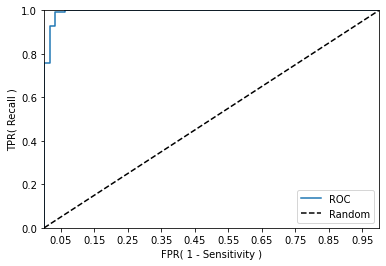

In [14]:
def roc_curve_plot(y_test , pred_proba):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
roc_auc_test = roc_auc_score(y_test, lr_preds)
print('AUC 스코어 : ', roc_auc_test)
roc_curve_plot(y_test, pred_proba[:,1])


AUC 값이 너무 커서 잘 안 보이니 일부러 임계값을 높여 상대적으로 낮아진 ROC 곡선 그래프 그림 그리기

AUC 스코어 :  0.9133597883597884


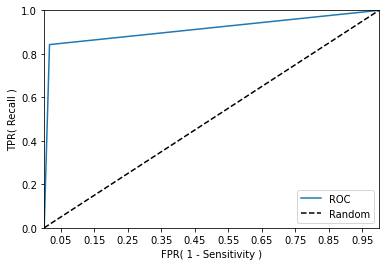

In [15]:
custom_threshold = 0.9
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba[:,1].reshape(-1,1)) 
custom_predict = binarizer.transform(pred_proba[:,1].reshape(-1,1))# 임계값 수정
roc_auc_test = roc_auc_score(y_test, custom_predict)
print('AUC 스코어 : ', roc_auc_test)
roc_curve_plot(y_test, custom_predict)